# LEDs and the Raspberry Pi

## Controlling the lights

The instructions below are for the circuit pictured here. Start by making sure your circuit is connected like this:

![raspbi_pinout_with_2_connections_leds.jpg](raspbi_pinout_with_2_connections_leds.jpg)

Now let's get set up to control the circuit with code. First, run this setup cell:

In [4]:
import RPi.GPIO as GPIO
import numpy as np
import math

GPIO.setwarnings(False)
GPIO.setmode(GPIO.BCM)

#Define on and off procedures so that we can use a shorter command to turn a particular pin on or off:
def on(pin):
    GPIO.output(pin, GPIO.HIGH)
     
def off(pin):
    GPIO.output(pin, GPIO.LOW)  

ModuleNotFoundError: No module named 'RPi'

For any GPIO pin (input/output connections on the Raspberry Pi) that you want to use to control an LED, set it up as output and turn the LED off to start. Here are the pin numbers for the diagram you followed:

In [4]:
GPIO.setup(12, GPIO.OUT)
off(12)

GPIO.setup(16, GPIO.OUT)
off(16)

Ok! Done with the setup. Now try using these commands to control your lights by running each cell and seeing what happens. If you don't see an error message  but your lights are not turning on, double check your connections and press down on your LEDs to make sure they are making a firm connection to the copper tape.

In [ ]:
on(12)

In [ ]:
on(12)

In [ ]:
off(16)

In [ ]:
off(16)

If you want to, you can use a variable so you can use names instead of numbers, like this:

sunrise_LED = 16
sunset_LED = 12

Now you can run the same commands and they will be a little more human-readable:

In [5]:
on(sunrise_LED)

on(sunset_LED)

Try it: 
 * Write some lines of code to turn both the LEDs on at the same time by running the code cell below:

What if you want to program in a delay? First, you need to import the sleep functionality (to teach your Pi how to nap!)

In [7]:
from time import sleep

Now you can add sleep (delay) commands to make your program leave the LEDs on or off for a defined amount of time:

In [ ]:
off(sunrise_LED)
sleep(1) #wait for 1 second
on(sunrise_LED)
sleep(1) #wait for 1 second
off(sunrise_LED)

Note that you can use decimal values for sleep as well. So you can get a delay of half a second:

In [14]:
sleep(0.5)

Try this: how fast can you blink your LEDs on and off and still see the change? Modify the sleep time below to experiment:

In [ ]:
off(sunrise_LED)
sleep(0.5) #change this number
on(sunrise_LED)
sleep(0.5) #change this number
off(sunrise_LED)

Now try this: write a small program (a few lines of code in the cell below) that helps you visualize sunrise and sunset on your mini paper diorama.

### <span style="color:blue"> With **on**, **off**, and **sleep**, you can program the animations of your choice onto your paper diorama. Now that you know how to connect the LEDs, you can put lights behind your own graph, or somewhere else...maybe to show points on a map, or something else that helps share your idea. Brainstorm with your partner!</span>

# More to Explore (if you have extra time)

If you have a lot of LEDs connected, you can put them in a list to make them easier to work with as a group. Note: the Pi can't handle too many LEDs, and they take time to connect...we recommend around 5 maximum in your project, and 3 if you are just testing. There are 3 in the examples below:

In [10]:
#Make a list of the pin numbers for all the Raspberry Pi GPIO pins that are connected to LEDs
pins = [12, 16, 22] #list of pin numbers

Now that they are in a list, we can use just a few lines of code to set them all up:

In [8]:
#Set up each one:
for pin in pins: #repeat once per pin in list
    GPIO.setup(pin, GPIO.OUT) #set pin to output mode
    off(pin) #turn pin off to start

NameError: name 'pins' is not defined

You can now use a "loop" to go through the entire pin list and have them do something at the same time:

In [ ]:
for pin in pins:
    off(pin)

Without pausing in between changes, the LEDs change too fast to see. We can use the sleep function to add delays so you can see the changes:

In [11]:
for pin in pins:
    on(pin)
    sleep(1)
    off(pin)

NameError: name 'on' is not defined

Try this: what program would you write to make the 3 LEDs to blink on and off at the same time instead of one after the other?

What if you wanted a behavior to repeat multiple times? You can also use a loop:


In [ ]:
led = 17
for i in range(10):
    on(led)
    sleep(1)
    off(led)

You can make a delay that changes every time it goes through the loop:

In [ ]:
led = 17
for delay in range(1,10):
    on(led)
    sleep(delay)
    off(led)

Try this: what if you wanted to simulate movement through your LEDs (say they represent running water or moving wind)? How would you program them, and how would you control their speed?

# Even More to Explore: Data and Paper Circuits

#### <span style="color:red"> Warning! Untested instructions, may not work without some tinkering. Provided for experimentation/curiosity. Try out if your project is already on track or done and you have extra time.</span>

### Visualization 1: Meter

LEDs in a row make something like a bar graph or a temperature display. We can use it to "replay" our sensor values and watch them change over time. First, read in the sensor log data as in the example called "graphing exercise":

In [13]:
import pandas as pd

#set the names of each sensor data column
names = ["TimeStamp", "Light", "Light(RGB)", "Temp(C)", "Pressure(kPa)", "Heading", "Analog0", "Analog1", "Analog2", "Analog3"]

#read in the data
data = pd.read_table('sensorlog_overnight.csv', sep=' , ', engine='python', names=names, parse_dates=['TimeStamp'])

Then draw a super simple plot so we can see what's going on:

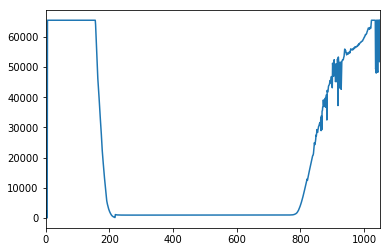

In [26]:
data['Light'].plot()

This program will "replay" your data on the LEDs over time:

In [ ]:
maximum = data['Light'].max() #get maximum sensor value measured
minimum = data['Light'].min() #get maximum sensor value measured
total_LEDs = len(pins) #total number of LED lights

for measurement in data['Light']: #do the following once per measurement
    level = math.floor(np.interp(measurement, [minimum,maximum], [0,total_LEDs])) #map the values so they match our number of LED lights
    for index in range(0, level): #turn on some of the LEDs to show the sensor measurement
        on(pins[index])
    sleep(0.02) #wait in between sensor readings
    for pin in pins: #turn LEDs off again
        off(pin)

### Visualization 2: Flow

Show things like wind speed, traffic flow, water flow,...

In [43]:
for measurement in data['Light']: #do the following once per measurement
    delay = np.interp(measurement, [minimum,maximum], [1,0.01]) #map the values to delay times
    for pin in pins:
        on(pin)
        sleep(delay)
        off(pin)


### Visualization 3: Pushbuttons and Averages

This example uses paper circuit switches (DIY pushbuttons).

In [33]:
morning_switch = 10
afternoon_switch = 9
night_switch = 11

switches = [morning_switch, afternoon_switch, night_switch]

for switch in switches:
    GPIO.setup(switch, GPIO.IN, pull_up_down=GPIO.PUD_UP)

light_measurements = data['Light'] #get column
    
afternoon_data = light_measurements[0:210]
night_data = light_measurements[211:780]
morning_data = light_measurements[780:]

morning_avg = morning_data.mean()
night_avg = night_data.mean()
afternoon_avg = afternoon_data.mean()

minimum = min([morning_avg, afternoon_avg, night_avg])
maximum = max([morning_avg, afternoon_avg, night_avg])

total_leds = len(leds)

data['Light']

def viz(value, total_leds):
    level = math.ceil(np.interp(value, [minimum,maximum], [1,total_leds])) #map the values so they match our number of LED lights
    for index in range(0, level): #turn on some of the LEDs to show the sensor measurement
        on(leds[index])

In [34]:
for _ in range(10000):
    if GPIO.input(morning_switch) == False:
        viz(morning_avg, 3)
    elif GPIO.input(afternoon_switch) == False:
        viz(afternoon_avg, 3)
    elif GPIO.input(night_switch) == False:
        viz(night_avg, 3)
    else:
        for led in leds:
            off(led)
    sleep(0.01)